# Google Mobility Data

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import requests
import os

In [2]:
# Go to repository root directory
if "_changed_dir" not in locals():
    os.chdir("../")
    _changed_dir = True

## Data download

In [3]:
raw_data_dir = 'data/raw'
if not os.path.exists(raw_data_dir):
    os.makedirs(raw_data_dir)

In [4]:

file_name = 'Google_Global_Mobility_Report.csv'
url = "https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv"

file_path = os.path.join(raw_data_dir, file_name)

if "_downloaded_google_mob" not in locals():
    pass
    # myfile = requests.get(url)
    # open(file_path, 'wb').write(myfile.content)

## Dataset features

In [5]:
goog_mob = pd.read_csv(file_path, parse_dates=['date'])

Remove some of the data that does not interest us

In [6]:
goog_mob.shape

(540126, 13)

In [7]:
# Remove US county info
goog_mob = goog_mob[goog_mob.sub_region_2.isna()]

In [8]:
goog_mob.shape

(227699, 13)

In [9]:
goog_mob.head(10)

,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
5,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-20,-2.0,1.0,6.0,1.0,1.0,1.0
6,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-21,-3.0,2.0,6.0,0.0,-1.0,1.0
7,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-22,-2.0,2.0,4.0,-2.0,3.0,1.0
8,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-23,-1.0,3.0,3.0,-1.0,4.0,1.0
9,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-24,-3.0,0.0,5.0,-1.0,3.0,1.0


In [10]:
geoid_columns = goog_mob.columns[:6]
data_columns = goog_mob.columns[7:]
print(geoid_columns)
print(data_columns)

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'iso_3166_2_code', 'census_fips_code'],
      dtype='object')
Index(['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')


In [11]:
print(f"Unique countries in dataset: {len(goog_mob.country_region.unique())}")
# Note if two countries have same region name this number will be wrong:
print(f"Unique sub_regions in dataset: {len(goog_mob.sub_region_1.unique())}") 
print(f"Data in range: {goog_mob.date.min()} to {goog_mob.date.max()}")

Unique countries in dataset: 135
Unique sub_regions in dataset: 1845
Data in range: 2020-02-15 00:00:00 to 2020-06-12 00:00:00


In [12]:
def sum_geo_cols_contents(row, geo_cols):
    out = ""
    for col in geo_cols:
        out += str(row[col]) + '_'
    str_rem = 'nan_'
    while str_rem == out[-len(str_rem):]:
        out = out[:-len(str_rem)]
    return out.strip(" _")

# This is slow avoid to rerun
if "unique_geo_id" not in goog_mob.columns:
    goog_mob["unique_geo_id"] = goog_mob.apply(
        lambda x: sum_geo_cols_contents(x, geoid_columns), axis=1
    )

In [13]:
print(f"Unique unique_geo_id in dataset: {len(goog_mob.unique_geo_id.unique())}") 

Unique unique_geo_id in dataset: 1991


## Reindex data

Use a multi index to separate date and geography information

In [14]:
goog_mob.set_index(
    pd.MultiIndex.from_frame(goog_mob[['unique_geo_id', 'date']]
), inplace=True)

Add a helper function to explore the available geo_ids

In [15]:
def find_matching_geo_id(
    goog_mob, 
    find_str='FR_France', 
    exclude_str='This garbage is not a country name'
):
    return [
        name for name in goog_mob.unique_geo_id.unique()
            if find_str in name 
            if exclude_str not in name
    ]

## Plotting data for google 

In [16]:
print(find_matching_geo_id(goog_mob, 'GB_United Kingdom', 'nan_'))

['GB_United Kingdom', 'GB_United Kingdom_Greater London', 'GB_United Kingdom_Greater Manchester', 'GB_United Kingdom_Merseyside', 'GB_United Kingdom_Na h-Eileanan an Iar', 'GB_United Kingdom_South Yorkshire', 'GB_United Kingdom_Tyne and Wear', 'GB_United Kingdom_West Midlands', 'GB_United Kingdom_West Yorkshire']


In [17]:
goog_mob.sample(5)

,,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,unique_geo_id
unique_geo_id,date,,,,,,,,,,,,,,
HU_Hungary,2020-05-15,HU,Hungary,NaN,NaN,NaN,NaN,2020-05-15,-30.0,-6.0,-2.0,-42.0,-37.0,14.0,HU_Hungary
LB_Lebanon_Nabatiyeh Governorate_nan_LB-NA,2020-05-12,LB,Lebanon,Nabatiyeh Governorate,NaN,LB-NA,NaN,2020-05-12,-3.0,27.0,25.0,NaN,-26.0,9.0,LB_Lebanon_Nabatiyeh Governorate_nan_LB-NA
VN_Vietnam_Lai Chau_nan_VN-01,2020-05-27,VN,Vietnam,Lai Chau,NaN,VN-01,NaN,2020-05-27,-33.0,0.0,-57.0,NaN,23.0,2.0,VN_Vietnam_Lai Chau_nan_VN-01
RO_Romania_Gorj County_nan_RO-GJ,2020-02-19,RO,Romania,Gorj County,NaN,RO-GJ,NaN,2020-02-19,2.0,5.0,-8.0,2.0,-1.0,-1.0,RO_Romania_Gorj County_nan_RO-GJ
BG_Bulgaria_Veliko Tarnovo Province_nan_BG-04,2020-02-18,BG,Bulgaria,Veliko Tarnovo Province,NaN,BG-04,NaN,2020-02-18,0.0,9.0,23.0,4.0,3.0,-2.0,BG_Bulgaria_Veliko Tarnovo Province_nan_BG-04


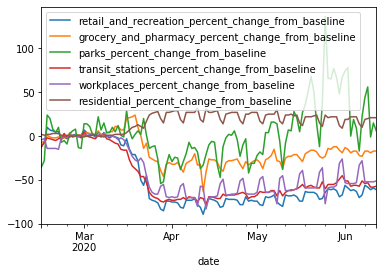

In [18]:
goog_mob.loc['GB_United Kingdom'].plot(y=data_columns)

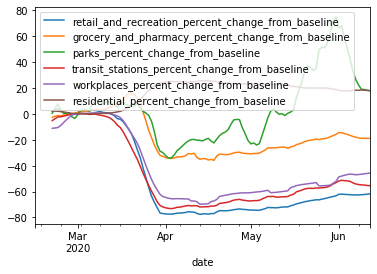

In [19]:
goog_mob.loc['GB_United Kingdom', data_columns].rolling(7).mean().plot()

## Notes on the google mobility data

This data corresponds to the number of visits for given types of locations as measured
by Google.

The baseline frequentation was measured between the 03/01/2020 and the 06/02/2020 and is normalised per day of the week.
This causes some artifacts, notably an apparent increase in workplace frequentation on week-ends. This is NOT an absolute
increase of frequentation on week-ends. This only suggests that essential workers represent a higher proportion of week-end
workers in normal times.

This justifies the use of a 7 day moving average IF we are merging with datasets which do not have a daily granularity.



## Data save

In [20]:
proc_data_dir = 'data/processed'
file_name = 'mobility_google.csv'

if not os.path.exists(proc_data_dir):
    os.makedirs(proc_data_dir)

file_path = os.path.join(proc_data_dir, file_name)
goog_mob.to_csv(file_path)